<a href="https://colab.research.google.com/github/Olimaol/CompNeuroPy/blob/olimaol_develop/notebooks/test_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install CompNeuroPy and ANNarchy

In [ ]:
!pip install CompNeuroPy
!git clone https://github.com/ANNarchy/ANNarchy && cd ANNarchy && git checkout develop && pip install .
!rm -rf ANNarchy

Cloning into 'ANNarchy'...
remote: Enumerating objects: 30590, done.
remote: Counting objects: 100% (9111/9111), done.
remote: Compressing objects: 100% (1868/1868), done.
remote: Total 30590 (delta 7370), reused 8955 (delta 7223), pack-reused 21479
Receiving objects: 100% (30590/30590), 19.35 MiB | 18.80 MiB/s, done.
Resolving deltas: 100% (23634/23634), done.
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'
Processing /content/ANNarchy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ANNarchy: filename=ANNarchy-4.8.1-cp310-cp310-linux_x86_64.whl size=2055169 sha256=21c94490fa22f85a8f81e73fb001631c9e16a6855a8e598576486ed321f8b2ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-nn2c_iqx/wheels/27/fe/ed/59a29dfb0abcc144a3e2959967c5f106d5da012bb1711593e7
Successfully built ANNarchy


#Import packages

In [29]:
from IPython.display import Image, display

#Run Code

In [ ]:
from ANNarchy import Population, setup, simulate, compile
from CompNeuroPy import (
    CompNeuroMonitors,
    PlotRecordings,
)
from CompNeuroPy.neuron_models import Izhikevich2007


### setup ANNarchy timestep and create results folder
setup(dt=0.1)

### first we create two populations, each consist of 1 neuron
Population(1, neuron=Izhikevich2007(I_app=0), name="my_pop1")
Population(1, neuron=Izhikevich2007(I_app=52), name="my_pop2")

### compile
compile()

### after compilation we can define the monitors using the monitor_dictionary
### and the CompNeuroMonitors class
### for my_pop1 we use a recording period of 2 ms
### for my_pop2 we do not give a recording preiod, therefore record every timestep
monitor_dictionary = {"my_pop1;2": ["v", "spike"], "my_pop2": ["v"]}
mon = CompNeuroMonitors(monitor_dictionary)

### In this part we demonstrate starting/pausing all monitors
### simulate for 100 ms [0, 100]
simulate(100)

### start all monitors and simulate for 100 ms [100, 200]
mon.start()
simulate(100)

### pause all monitors and simulate for 100 ms [200, 300]
mon.pause()
simulate(100)

### In this part we demonstrate starting single monitors
### start only monitor for my_pop1 and simulate for 100 ms [300, 400]
mon.start(compartment_list=["my_pop1"])
simulate(100)

### start all monitors and simulate for 100 ms [400, 500]
mon.start()
simulate(100)

### In this part we demonstrate pausing single monitors
### pause monitor for my_pop1 and simulate for 100 ms [500, 600]
mon.pause(compartment_list=["my_pop1"])
simulate(100)

### start all monitors and simulate for 100 ms [600, 700]
mon.start()
simulate(100)

### In this part we demonstrate chunking recordings by reset
### reset WITHOUT model, creating new chunk --> first chunk [0, 700]
### also in this chunk do not record the first 100 ms
### WITHOUT model --> time continues at 700 ms [700, 800]
mon.reset(model=False)
mon.pause()
simulate(100)

### start all monitors and simulate for 700 ms [800, 1500]
mon.start()
simulate(700)

### reset WITH model, creating new chunk --> second chunk [700, 1500]
### in third chunk time is reset to 0 ms
### also in this chunk do not record the first 100 ms [0, 100]
mon.reset(model=True)
mon.pause()
simulate(100)

### start all monitors and simulate for 700 ms [100, 800]
mon.start()
simulate(700)

### Next we demonstrate getting recordings DURING SIMULATION by using
### get_recordings_and_clear
### this also resets the monitors back to their initialized state, i.e. there are no
### recordings and they are not started yet
### recordings1 consists of 3 chunks, third chunk [0, 800]
recordings1, recording_times1 = mon.get_recordings_and_clear()

### Now continue simulation, creating NEW RECORDINGS, monitors are not started yet
### model was not reset, so time continues at 800 ms
### simulate for 100 ms [800, 900]
simulate(100)

### start all monitors and simulate for 100 ms [900, 1000]
mon.start()
simulate(100)

### reset monitors and model, creating new chunk --> first chunk [800, 1000]
### simulate for 100 ms [0, 100]
mon.reset(model=True)
simulate(100)

### get recordings using get_recordings_and_clear
### this time directly start recording again
### recordings2 consists of 2 chunks, second chunk [0, 100]
recordings2, recording_times2 = mon.get_recordings_and_clear()

### Now continue simulation, creating NEW RECORDINGS
### directly start monitors and reset model so time is reset to 0 ms
### simulate for 100 ms [0, 100]
mon.start()
mon.reset(model=True)
simulate(100)

### get recordings the normal way (simultions are finished)
### recordings3 consists of 1 chunk [0, 100]
recordings3 = mon.get_recordings()
recording_times3 = mon.get_recording_times()

### print the idx and time lims of the recordings and the sizes of the recorded
### arrays
print("#################### ALL RECORDINGS INFO ####################")
recordings_list = [recordings1, recordings2, recordings3]
for all_times_idx, all_times in enumerate(
    [recording_times1.all(), recording_times2.all(), recording_times3.all()]
):
    print(f"recordings{all_times_idx+1}")
    for chunk in range(len(all_times)):
        print(f"\tchunk: {chunk}")
        for pop_name in ["my_pop1", "my_pop2"]:
            print(f"\t\tpop_name: {pop_name}")
            print(
                f"\t\trecording_array_size: {recordings_list[all_times_idx][chunk][f'{pop_name};v'].shape}"
            )
            for time_point in ["start", "stop"]:
                print(f"\t\t\ttime_point: {time_point}")
                for unit in ["ms", "idx"]:
                    print(f"\t\t\t\tunit: {unit}")
                    for period in range(
                        len(all_times[chunk][pop_name][time_point][unit])
                    ):
                        print(
                            f"\t\t\t\t\tperiod {period}: {all_times[chunk][pop_name][time_point][unit][period]}"
                        )
print("#############################################################")

### plot recordings 1 consisting of 3 chunks
for chunk in range(len(recordings1)):
    ### using plot_recordings which plots the recordings of one chunk
    PlotRecordings(
        figname=f"monitor_recordings_1_chunk{chunk}.png",
        recordings=recordings1,
        recording_times=recording_times1,
        shape=(2, 2),
        plan={
            "position": [1, 2, 3],
            "compartment": ["my_pop1", "my_pop2", "my_pop1"],
            "variable": ["v", "v", "spike"],
            "format": ["line", "line", "raster"],
        },
        chunk=chunk,
    )

### plot recordings 2 consisting of 2 chunks
for chunk in range(len(recordings2)):
    ### using plot_recordings which plots the recordings of one chunk
    PlotRecordings(
        figname=f"monitor_recordings_2_chunk{chunk}.png",
        recordings=recordings2,
        recording_times=recording_times2,
        shape=(2, 2),
        plan={
            "position": [1, 2, 3],
            "compartment": ["my_pop1", "my_pop2", "my_pop1"],
            "variable": ["v", "v", "spike"],
            "format": ["line", "line", "raster"],
        },
        chunk=chunk,
    )

### plot recordings 3 consisting of 1 chunk
for chunk in range(len(recordings3)):
    ### using plot_recordings which plots the recordings of one chunk
    PlotRecordings(
        figname=f"monitor_recordings_3_chunk{chunk}.png",
        recordings=recordings3,
        recording_times=recording_times3,
        shape=(2, 2),
        plan={
            "position": [1, 2, 3],
            "compartment": ["my_pop1", "my_pop2", "my_pop1"],
            "variable": ["v", "v", "spike"],
            "format": ["line", "line", "raster"],
        },
        chunk=chunk,
    )



Compiling ...  OK 
#################### ALL RECORDINGS INFO ####################
recordings1
	chunk: 0
		pop_name: my_pop1
		recording_array_size: (200, 1)
			time_point: start
				unit: ms
					period 0: 100.0
					period 1: 300.0
					period 2: 600.0
				unit: idx
					period 0: 0
					period 1: 50
					period 2: 150
			time_point: stop
				unit: ms
					period 0: 198.0
					period 1: 498.0
					period 2: 698.0
				unit: idx
					period 0: 49
					period 1: 149
					period 2: 199
		pop_name: my_pop2
		recording_array_size: (4000, 1)
			time_point: start
				unit: ms
					period 0: 100.0
					period 1: 400.0
				unit: idx
					period 0: 0
					period 1: 1000
			time_point: stop
				unit: ms
					period 0: 199.9
					period 1: 699.9
				unit: idx
					period 0: 999
					period 1: 3999
	chunk: 1
		pop_name: my_pop1
		recording_array_size: (350, 1)
			time_point: start
				unit: ms
					period 0: 800.0
				unit: idx
					period 0: 0
			time_point: stop
				unit: ms
					period 0: 1498.0


#Display figures

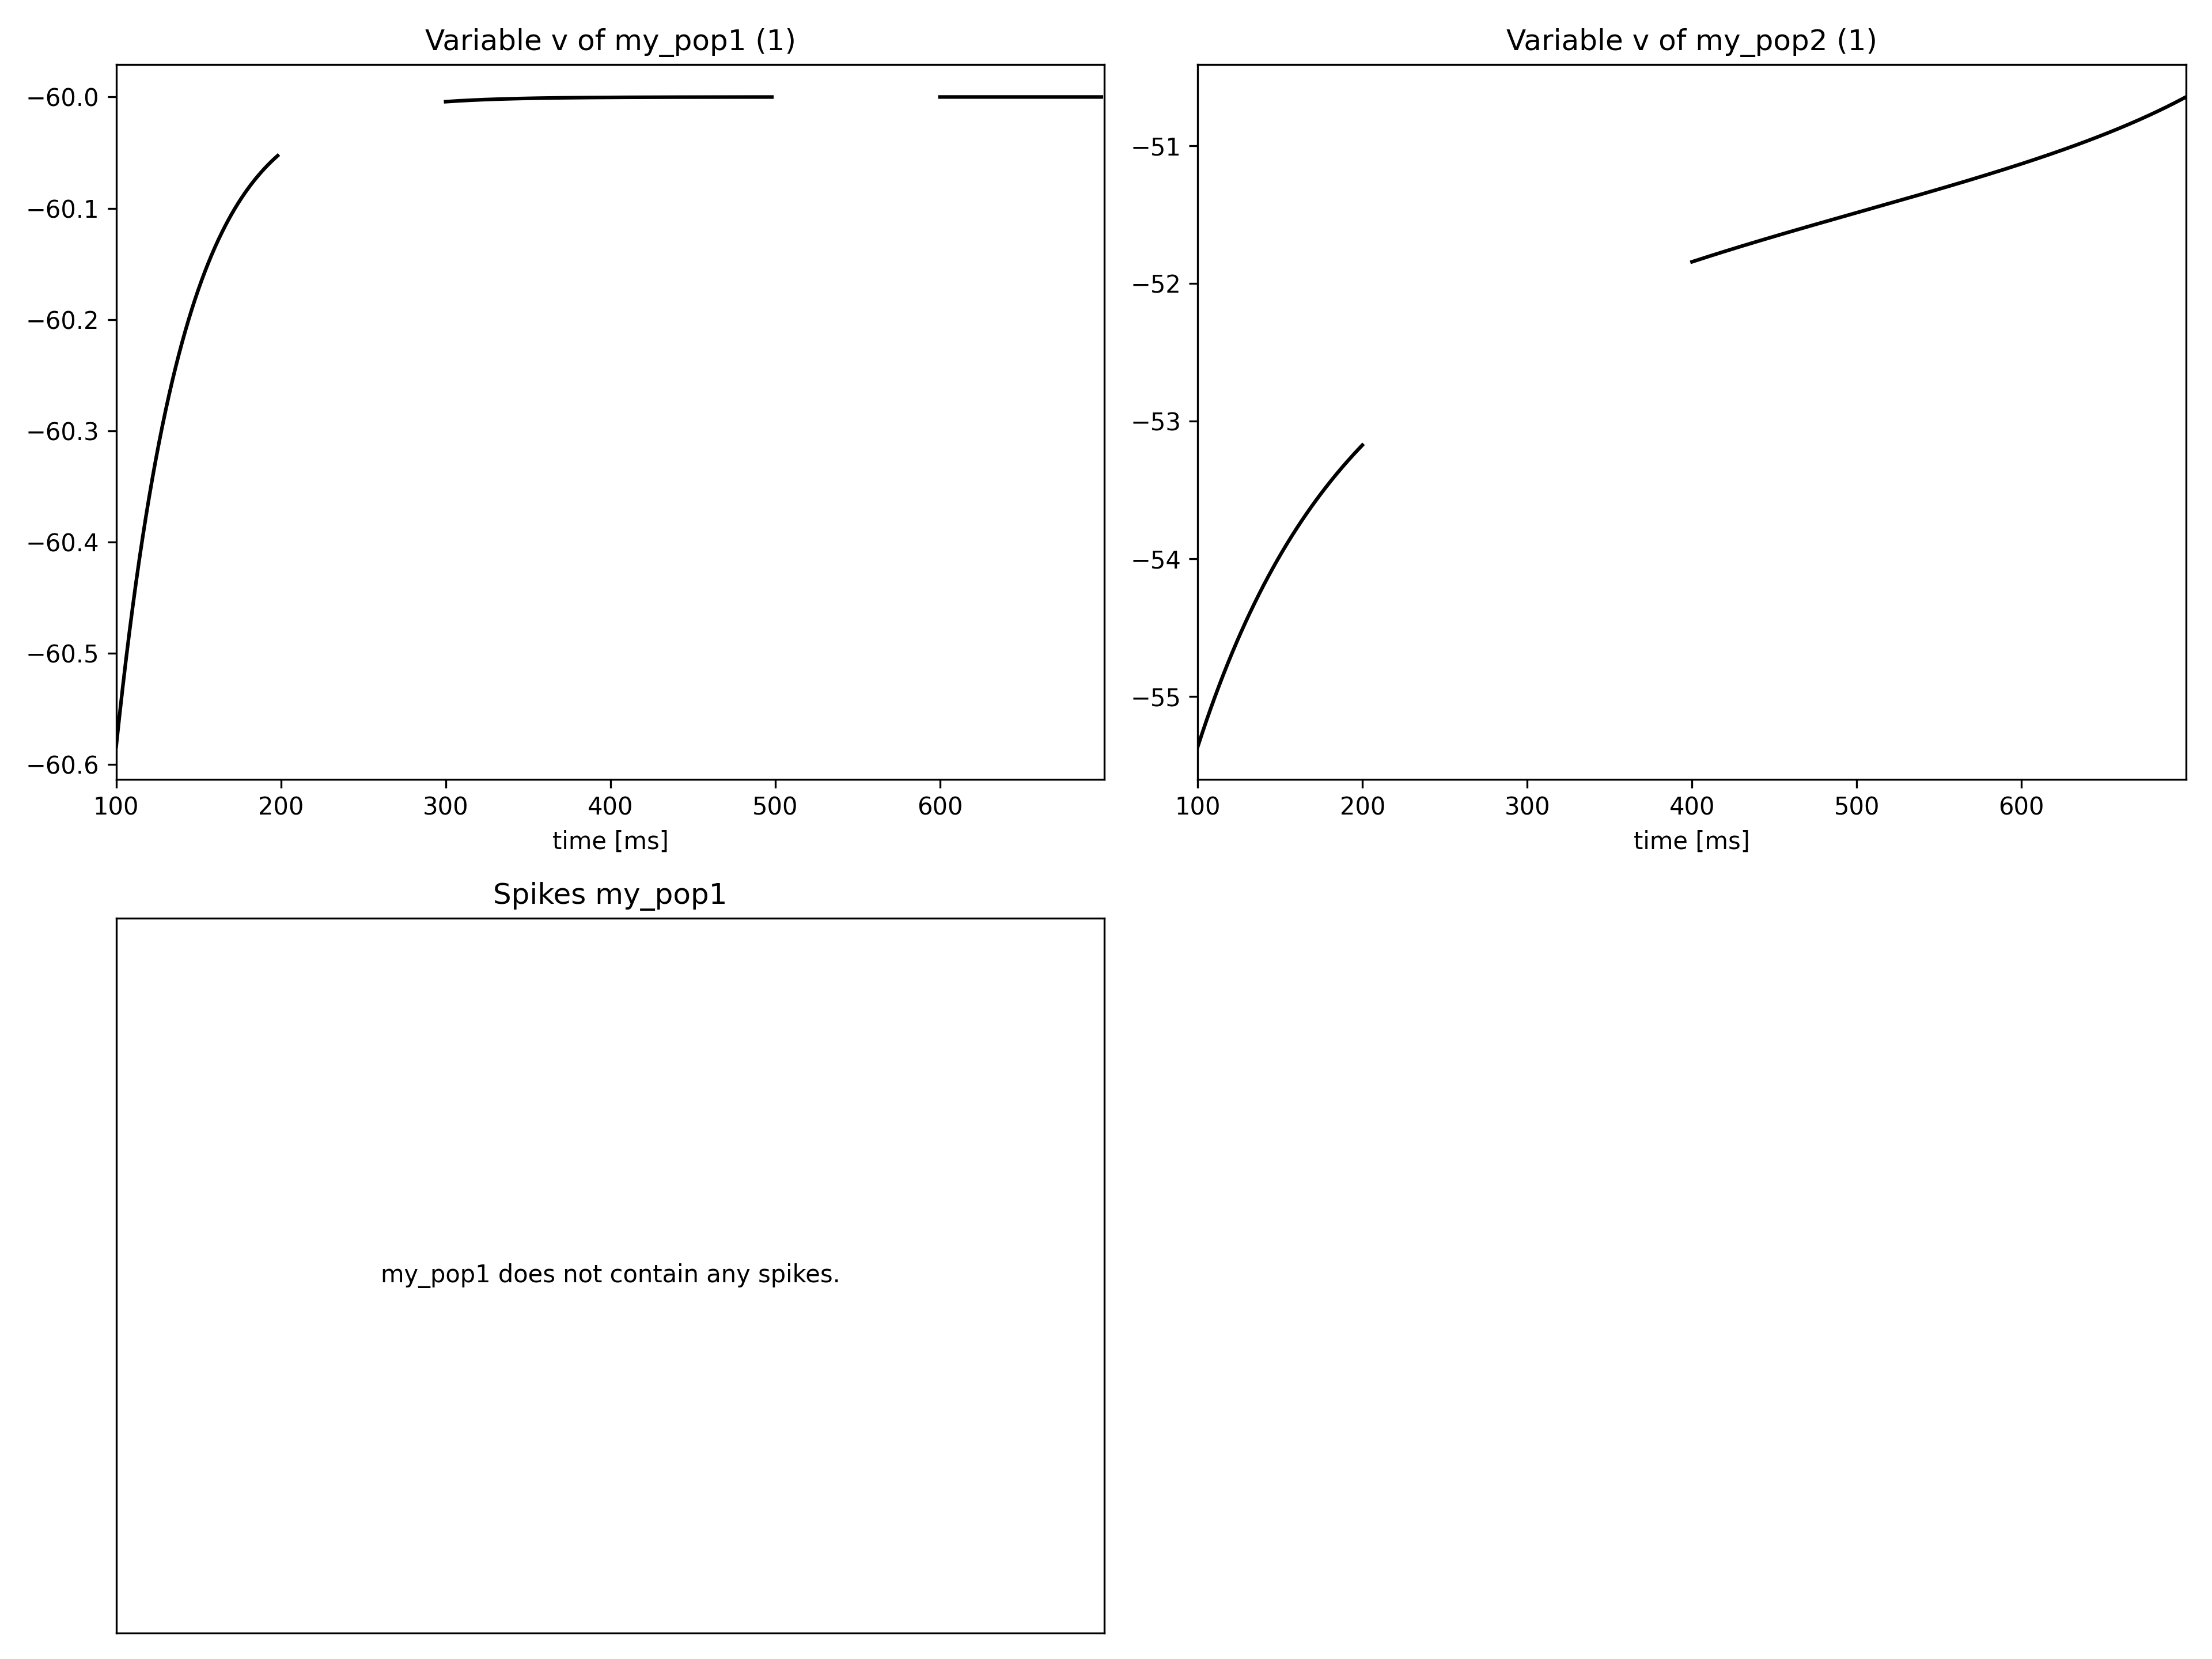

In [31]:
display(Image(filename='monitor_recordings_1_chunk0.png', height=700))

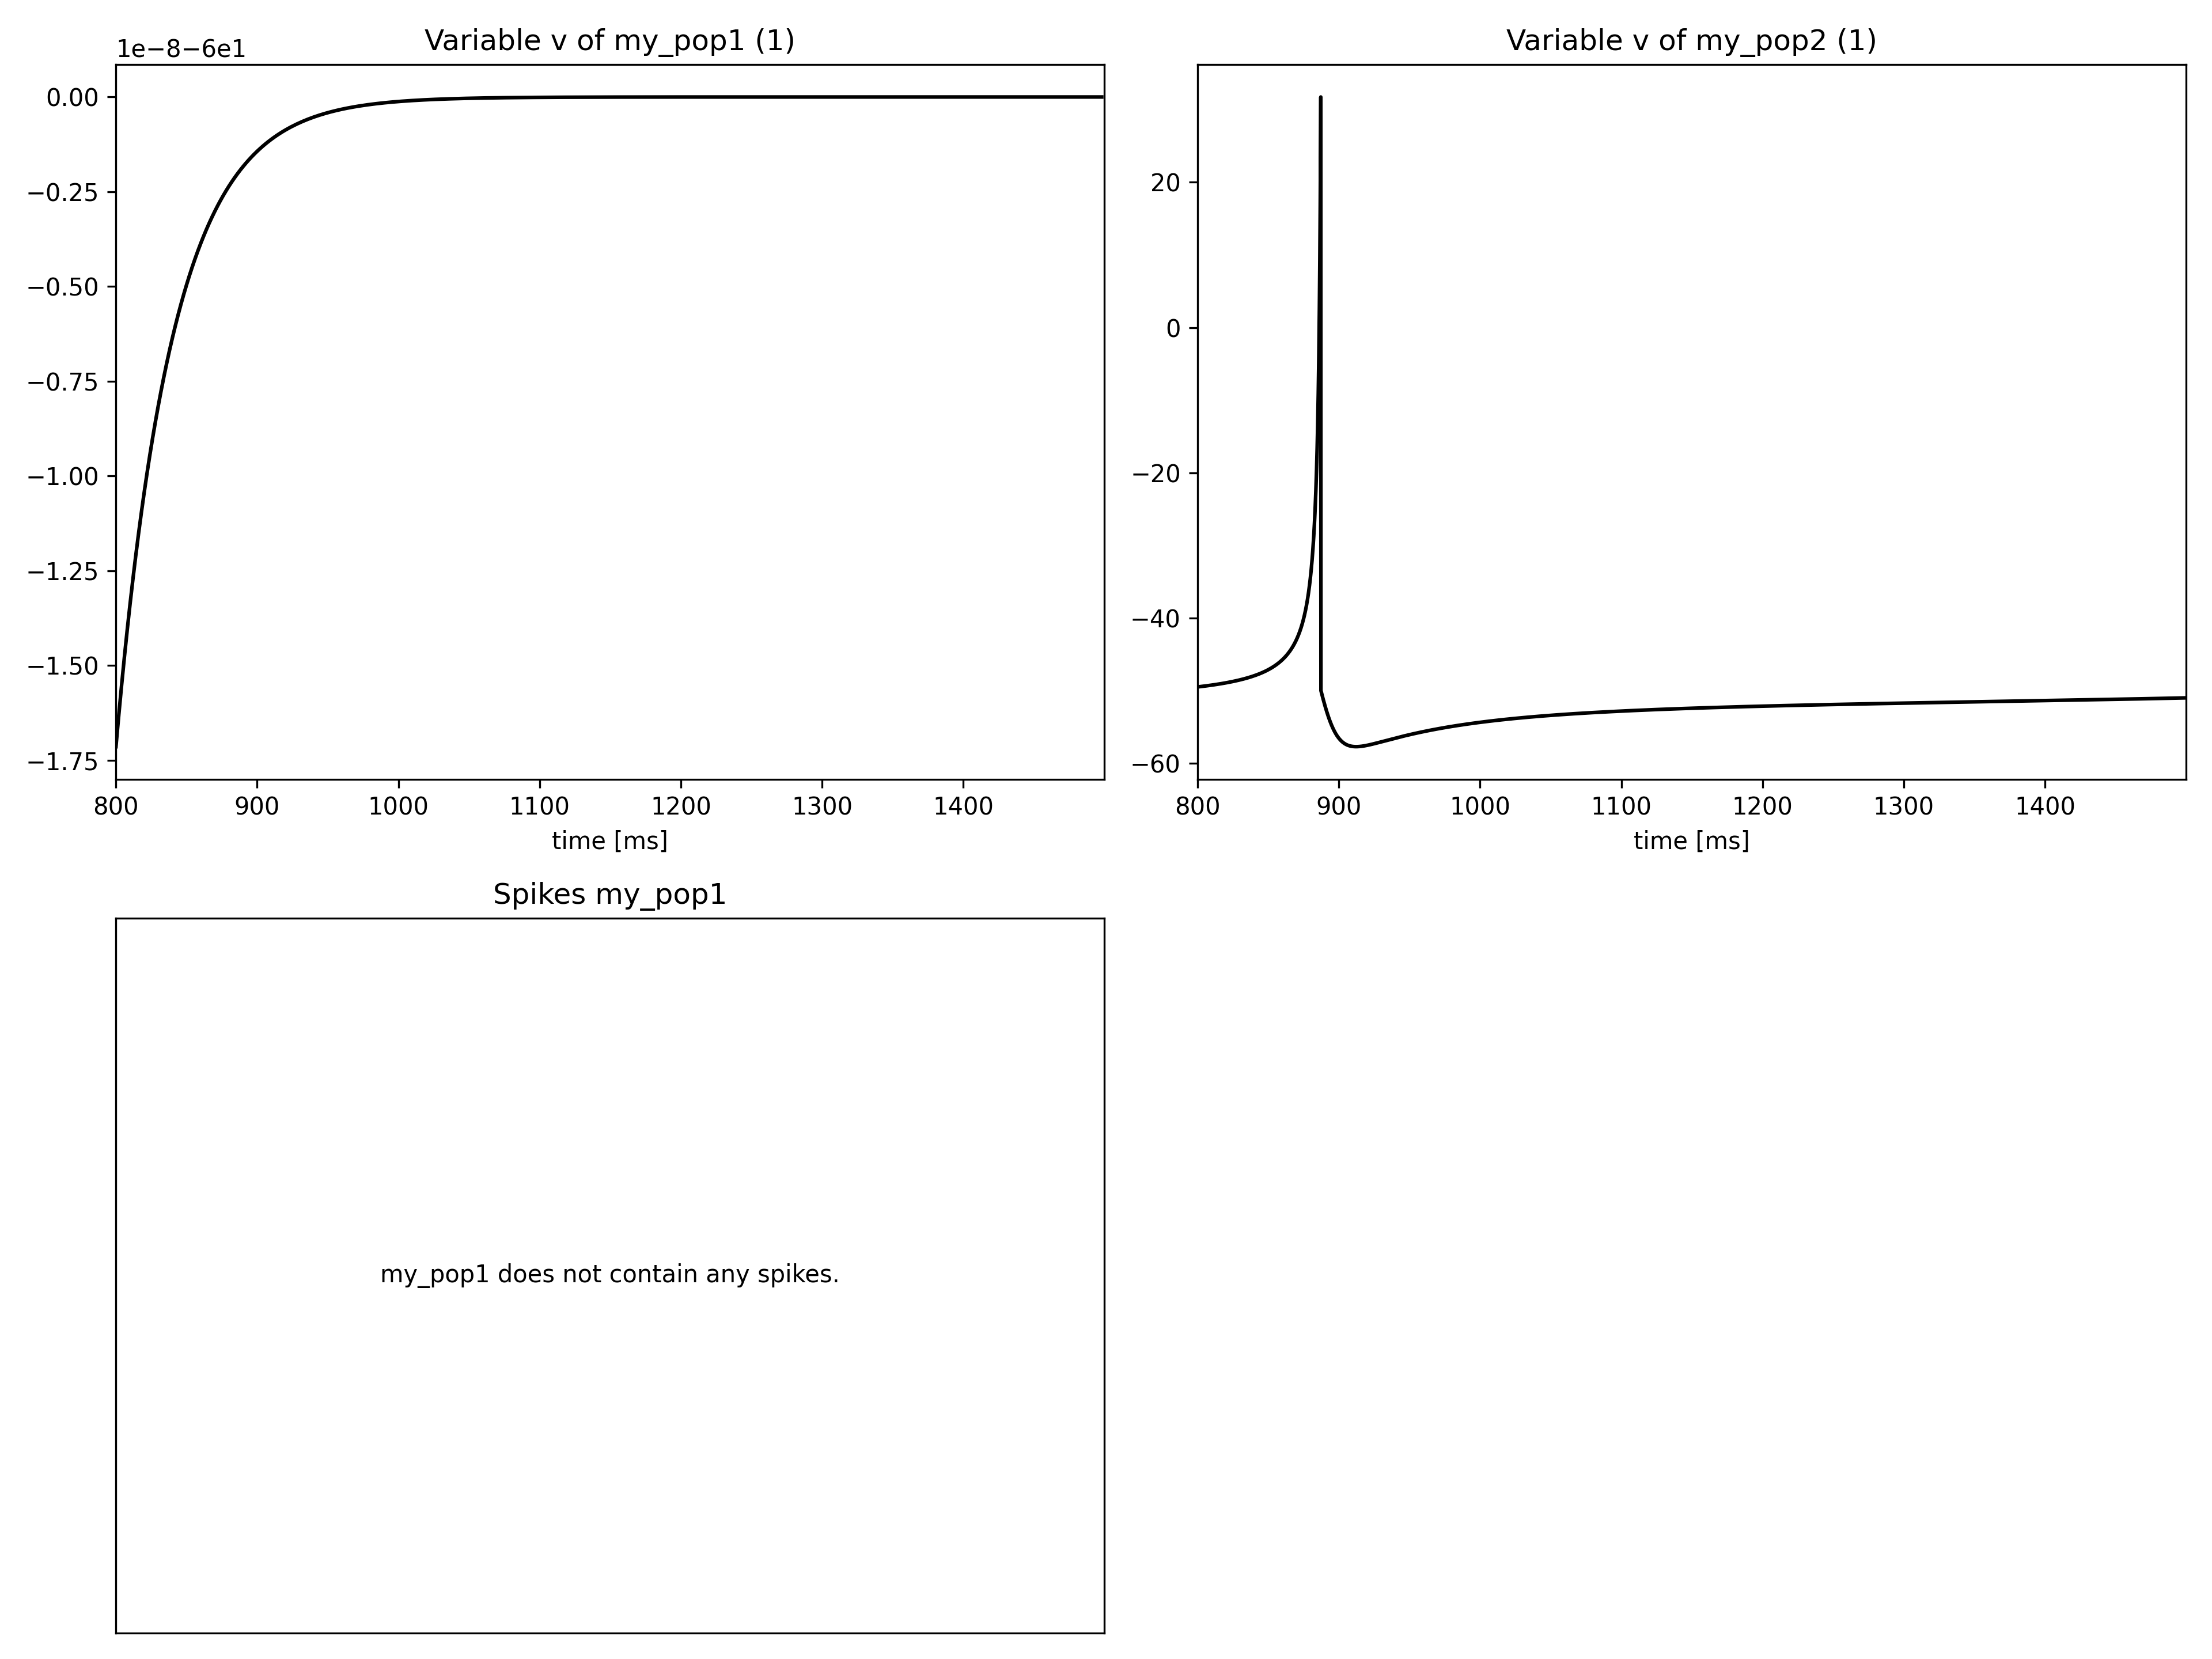

In [32]:
display(Image(filename='monitor_recordings_1_chunk1.png', height=700))